<a href="https://colab.research.google.com/github/Pushkar004/Data_Science_Projects/blob/main/Project4_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
import numpy as np


In [125]:
df=pd.read_csv('/content/drive/MyDrive/Learn_tube/Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [126]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)



Missing values in each column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [129]:
 #Checking data types and statistical information of the columns
print("\nSummary of numerical features:\n", df.describe())
print("\nDistribution of categorical features:\n", df.select_dtypes(include=['object']).nunique())


Summary of numerical features:
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Distribution of categorical features:
 customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64


In [130]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Observation: Total charges data type is object. Should be numerical for it to be relevant feature.

In [131]:
# Convert column to float, with error handling for non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [132]:
print(df['TotalCharges'].dtype)
print(df['TotalCharges'].isnull().sum())


float64
11


In [133]:
df[df['TotalCharges'].isnull()]     #Rows with TotalCharges having NAN values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [134]:
df = df.dropna(subset=['TotalCharges'])   # dropping rows with NAN values

In [135]:
print(df['TotalCharges'].isnull().sum())

0


In [136]:
# dropping customerID column as it is not useful for churn prediction
df = df.drop(columns=['customerID'])

In [137]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


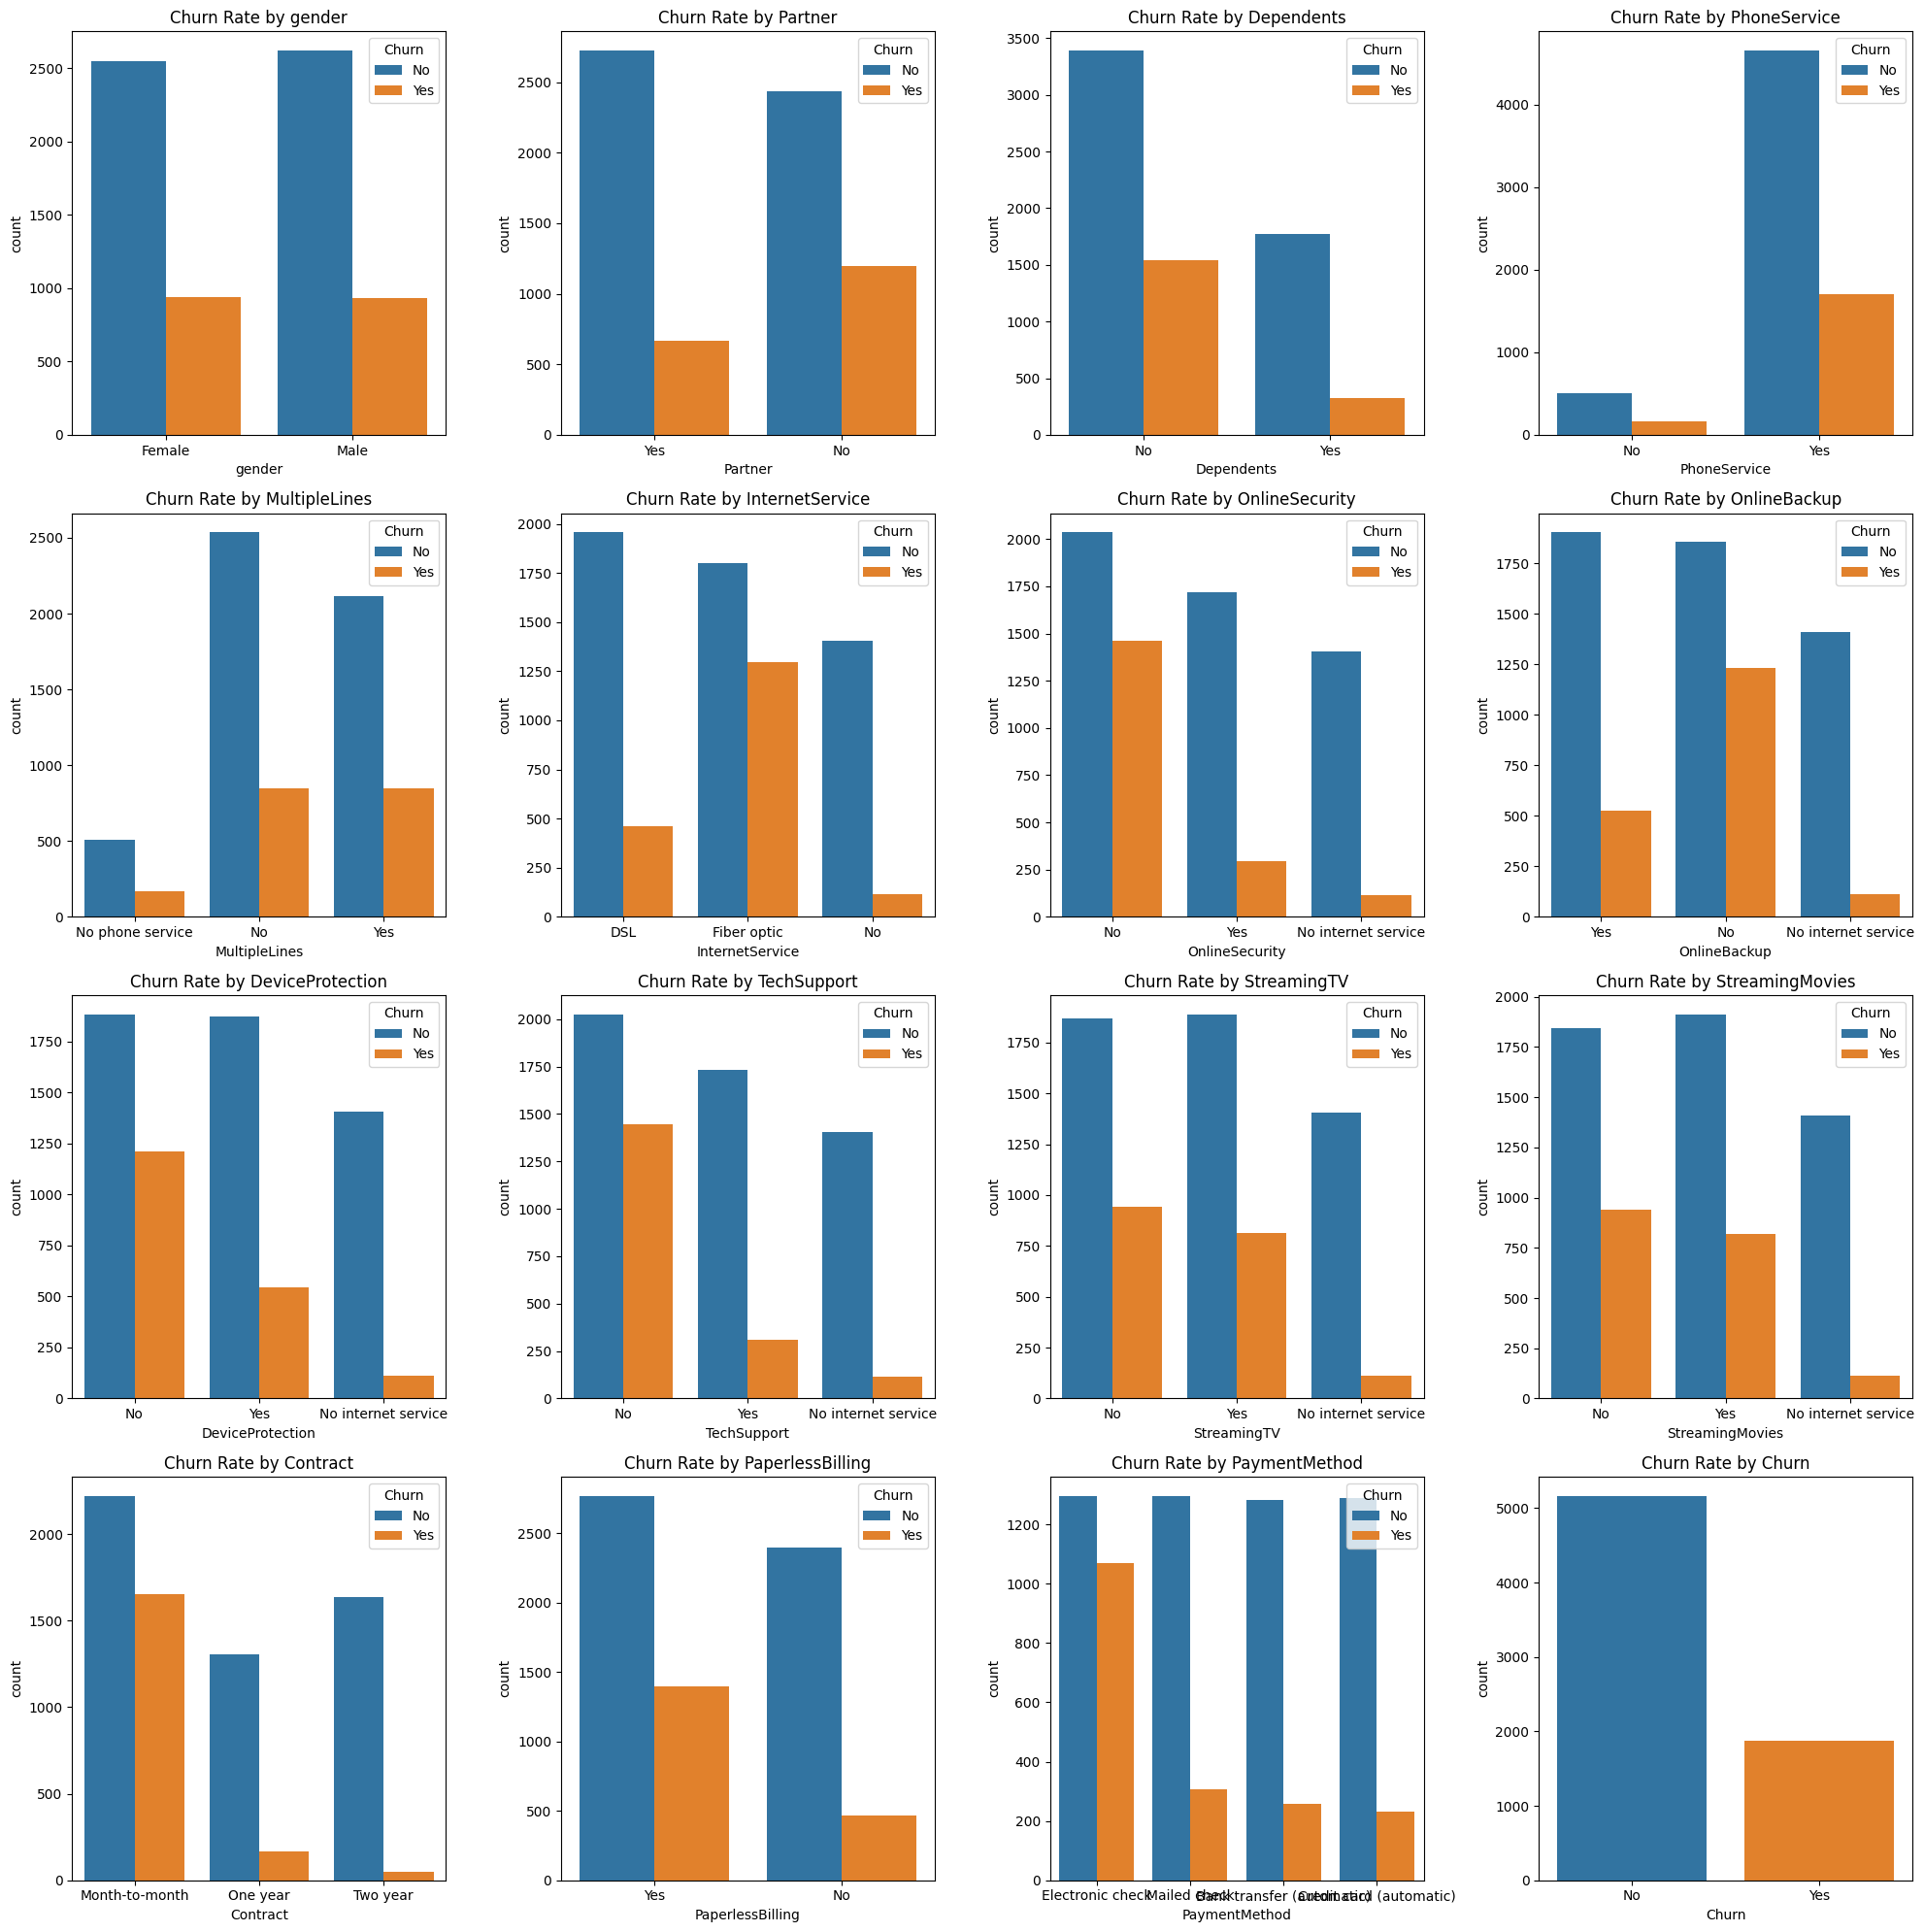

In [138]:
# Plotting churn rate by categoraical feature

import matplotlib.pyplot as plt
import seaborn as sns

# Define the grid size
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4x4 grid
axes = axes.flatten()  # Flatten the 2D array to 1D for easier indexing

for i, feature in enumerate(df_categorical.columns):
    sns.countplot(data=df_categorical, x=feature, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn Rate by {feature}')

plt.tight_layout()  # Adjusting layout to prevent overlap
plt.show()


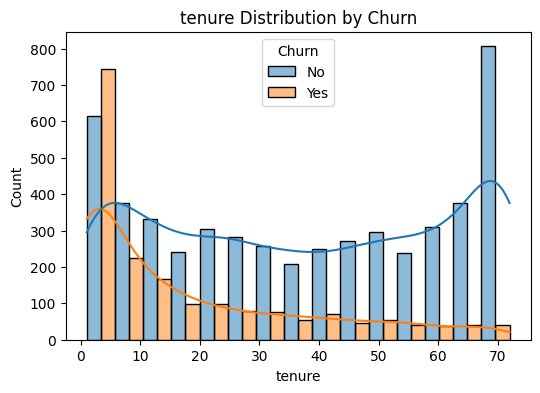

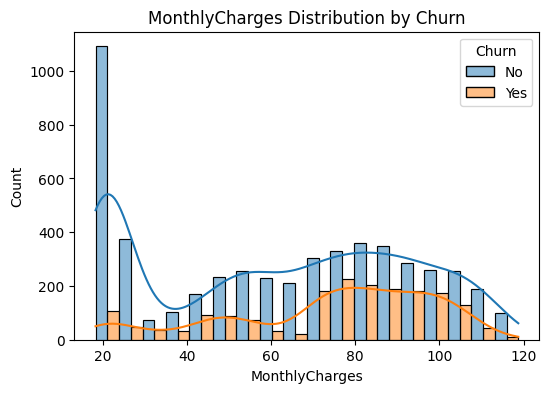

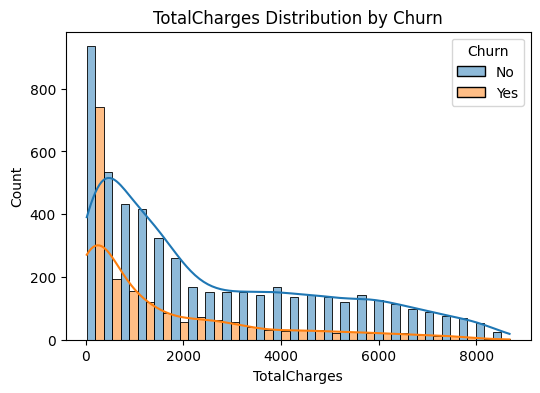

In [139]:
# Plotting churn rate by numerical feature

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feature, hue='Churn', kde=True, multiple="dodge")
    plt.title(f'{feature} Distribution by Churn')
    plt.show()


**Feature Engineering (Adding feature)**

In [140]:
# Create tenure groups for improving interpretability and potentially improving model performance
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, np.inf], labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5+ Years'])

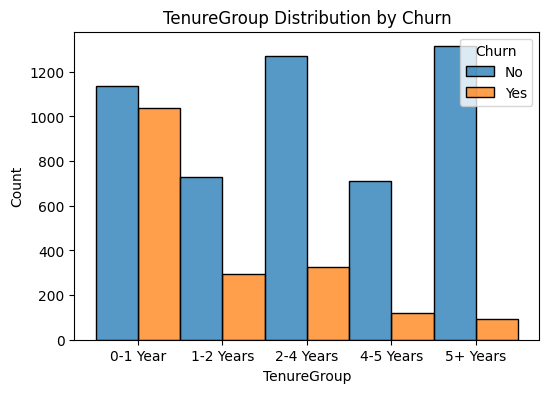

In [141]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='TenureGroup', hue='Churn', multiple="dodge")
plt.title(f'TenureGroup Distribution by Churn')
plt.show()


Observation: As tenure increases, the churn count has reduced

In [142]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureGroup'],
      dtype='object')

In [143]:
df['TenureGroup'].dtype

CategoricalDtype(categories=['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years',
                  '5+ Years'],
, ordered=True, categories_dtype=object)

In [144]:
df['TenureGroup'] = df['TenureGroup'].astype(object)

In [145]:
df_categorical=df.select_dtypes(include=['object'])


In [146]:
df_categorical = df_categorical.drop(columns=['Churn'])

In [147]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.get_dummies(df, columns=df_categorical.columns, drop_first=True)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [148]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2 Years,TenureGroup_2-4 Years,TenureGroup_4-5 Years,TenureGroup_5+ Years
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,True,False,False,False,False,True,False,True,False,False
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [149]:
#standardizing the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [150]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Random Forest Classifier**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



**Hyperparameters Tunning**

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],               # Number of trees
    'max_features': ['sqrt', 'log2', None],             # Number of features to consider at each split
    'max_depth': [10, 20, 30, 40, None],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],                    # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],                      # Minimum number of samples at each leaf node
    'bootstrap': [True, False]                          # Whether to use bootstrapping
}

# Initialize Random Forest model
rf_model2 = RandomForestClassifier(random_state=40)

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model2, param_distributions=param_grid,
                               n_iter=100, scoring='accuracy', cv=3, verbose=2,
                               random_state=42, n_jobs=-1)

# Fit the randomized search model
rf_random.fit(X_train, y_train)

# Best parameters from Randomized Search
print("Best parameters found: ", rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


In [32]:
optimized_rf = RandomForestClassifier(
    n_estimators=rf_random.best_params_['n_estimators'],
    max_features=rf_random.best_params_['max_features'],
    max_depth=rf_random.best_params_['max_depth'],
    min_samples_split=rf_random.best_params_['min_samples_split'],
    min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
    bootstrap=rf_random.best_params_['bootstrap'],
    random_state=42
)

# Fit the optimized model
optimized_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_optimized = optimized_rf.predict(X_test)

print("Optimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [33]:
from sklearn.model_selection import GridSearchCV

# Narrow down the parameter grid based on RandomizedSearch results
param_grid = {
    'n_estimators': [rf_random.best_params_['n_estimators'] - 100, rf_random.best_params_['n_estimators'], rf_random.best_params_['n_estimators'] + 100],
    'max_depth': [rf_random.best_params_['max_depth'] - 10, rf_random.best_params_['max_depth'], rf_random.best_params_['max_depth'] + 10],
    'min_samples_split': [rf_random.best_params_['min_samples_split'] - 1, rf_random.best_params_['min_samples_split'], rf_random.best_params_['min_samples_split'] + 1],
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(estimator=optimized_rf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit the grid search model
rf_grid.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters found by Grid Search: ", rf_grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found by Grid Search:  {'max_depth': 30, 'min_samples_split': 9, 'n_estimators': 300}


In [34]:
# Retrieve the best parameters from GridSearchCV
best_params = rf_grid.best_params_

# Initialize the Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    max_features=best_params.get('max_features', 'sqrt'),  # Default to 'sqrt' if 'max_features' wasn't in GridSearch
    min_samples_leaf=best_params.get('min_samples_leaf', 1),  # Default to 1 if not in GridSearch
    bootstrap=best_params.get('bootstrap', True),  # Default to True if not in GridSearch
    random_state=42
)

# Train the final model on the full training data
final_rf_model.fit(X_train, y_train)

# Make predictions and evaluate the optimized model
y_pred_final = final_rf_model.predict(X_test)

# Evaluation metrics
print("Final Optimized Classification Report:\n", classification_report(y_test, y_pred_final))


Final Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



The efficiency has not improved from Gridsearch CV and Randomsearch CV

**Feature Engineering (Feature Selection)**

In [35]:
# Check feature importances and remove features with very low importance
feature_importances = pd.DataFrame(final_rf_model.feature_importances_, index=X.columns, columns=['importance'])
low_importance_features = feature_importances[feature_importances['importance'] < 0.01].index
X_reduced = X.drop(columns=low_importance_features)

In [36]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2 Years,TenureGroup_2-4 Years,TenureGroup_4-5 Years,TenureGroup_5+ Years
0,0,-1.280248,-1.161694,-0.994194,False,True,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,0.064303,-0.260878,-0.173740,True,False,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
2,0,-1.239504,-0.363923,-0.959649,True,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
3,0,0.512486,-0.747850,-0.195248,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,-1.239504,0.196178,-0.940457,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.343137,0.664868,-0.129180,True,True,True,True,False,True,...,True,False,True,False,False,True,True,False,False,False
7039,0,1.612573,1.276493,2.241056,False,True,True,True,False,True,...,True,False,True,True,False,False,False,False,False,True
7040,0,-0.872808,-1.170004,-0.854514,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False
7041,1,-1.158016,0.319168,-0.872095,True,True,False,True,False,True,...,False,False,True,False,False,True,False,False,False,False


In [37]:
X_reduced

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_5+ Years
0,0,-1.280248,-1.161694,-0.994194,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.064303,-0.260878,-0.173740,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.239504,-0.363923,-0.959649,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
3,0,0.512486,-0.747850,-0.195248,True,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.343137,0.664868,-0.129180,True,True,True,True,False,True,...,True,True,True,True,False,True,False,False,True,False
7039,0,1.612573,1.276493,2.241056,False,True,True,True,True,False,...,False,True,True,True,False,True,True,False,False,True
7040,0,-0.872808,-1.170004,-0.854514,False,True,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
7041,1,-1.158016,0.319168,-0.872095,True,True,False,True,True,False,...,False,False,False,False,False,True,False,False,True,False


In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train2, y_train2)

# Make predictions
y_pred2 = rf_model.predict(X_test2)

# Evaluate model
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.62      0.47      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



Observation: Feature Selection has also not improved efficiency

**Using SMOTE**

In [40]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the training data
smote = SMOTE(random_state=4)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [41]:
#Checking the class distribution after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_train_balanced).value_counts())

Class distribution before SMOTE: Churn
0    3614
1    1308
Name: count, dtype: int64
Class distribution after SMOTE: Churn
1    3614
0    3614
Name: count, dtype: int64


In [42]:
rf_model4 = RandomForestClassifier(random_state=9)
rf_model4.fit(X_train_balanced, y_train_balanced)

# Predictions on the test data
y_pred4 = rf_model4.predict(X_test)

In [43]:
print("Classification Report:\n", classification_report(y_test, y_pred4))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1549
           1       0.56      0.61      0.58       561

    accuracy                           0.77      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.77      0.77      0.77      2110



Observation: Accuarcy has improved slightly for churn case but overall accuracy is slightly reduced.

Using SMOTE on reduced features

In [44]:
# Applying SMOTE to balance the training data
smote = SMOTE(random_state=7)
X_train_balanced2, y_train_balanced2 = smote.fit_resample(X_train2, y_train2)

In [45]:
rf_model5 = RandomForestClassifier(random_state=11)
rf_model5.fit(X_train_balanced2, y_train_balanced2)

# Predictions on the test data
y_pred5 = rf_model5.predict(X_test2)

print("Classification Report:\n", classification_report(y_test2, y_pred5))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1549
           1       0.56      0.64      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.78      0.77      0.78      2110



Observation: No further improvement is observed

# **XGBoost Classifier**

In [46]:
from xgboost import XGBClassifier

# Initializing the model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,  # Avoids a warning related to encoding
    eval_metric='logloss'     # Recommended for binary classification
)

# Train the XGBoost model on the original imbalanced data
xgb_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:33:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.62      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



**Using Hyperparameter Tunning**

In [47]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize the XGBoost classifier
xgb_model2 = XGBClassifier(random_state=4, use_label_encoder=False, eval_metric='logloss')

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model2,
    param_distributions=param_grid,
    n_iter=50,  # Number of different combinations to try
    scoring='roc_auc',  # Optimizing based on ROC AUC score
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model from random search
best_xgb_model = random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:34:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [48]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


In [49]:
# Predictions on the test data
y_pred2 = best_xgb_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



Observation: The Overall Acuuracy has improved slightly

**Using SMOTE on XGBOOST**

In [50]:
from xgboost import XGBClassifier

# Initializing the model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,  # Avoids a warning related to encoding
    eval_metric='logloss'     # Recommended for binary classification
)

# Train the XGBoost model on the original imbalanced data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:34:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1549
           1       0.54      0.74      0.62       561

    accuracy                           0.76      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.76      0.77      2110



Using SMOTE with Hyperparameter tunning on XGBOOST

In [51]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize the XGBoost classifier
xgb_model2 = XGBClassifier(random_state=7, use_label_encoder=False, eval_metric='logloss')

# Set up the RandomizedSearchCV
random_search2 = RandomizedSearchCV(
    estimator=xgb_model2,
    param_distributions=param_grid,
    n_iter=50,  # Number of different combinations to try
    scoring='roc_auc',  # Optimizing based on ROC AUC score
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on the training data
random_search2.fit(X_train_balanced, y_train_balanced)

# Get the best model from random search
best_xgb_model2 = random_search2.best_estimator_
print("Best Hyperparameters:", random_search2.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:34:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [52]:
# Predictions on the test data
y_pred2 = best_xgb_model2.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1549
           1       0.54      0.60      0.57       561

    accuracy                           0.76      2110
   macro avg       0.69      0.71      0.70      2110
weighted avg       0.77      0.76      0.76      2110



Observation: The best overall accuracy is given by tunned XGboost(80%) whereas the best accuracy for churn prediction case is given by XGBoost on Balance data using SMOTE(f1-score= 0.62 for churn case(class= 1))

# **Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define a pipeline to standardize the data and apply Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))  # Logistic Regression
])

# Define the parameter grid for Logistic Regression
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2']  # L1 and L2 regularization
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimizing based on ROC AUC score
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_logreg_model = grid_search.best_estimator_

# Predictions on the test data
y_pred = best_logreg_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Using SMOTE

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define a pipeline to standardize the data and apply Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))  # Logistic Regression
])

# Define the parameter grid for Logistic Regression
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2']  # L1 and L2 regularization
}

# Set up the GridSearchCV
grid_search2 = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimizing based on ROC AUC score
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search2.fit(X_train_balanced, y_train_balanced)

# Get the best model from grid search
best_logreg_model2 = grid_search2.best_estimator_

# Predictions on the test data
y_pred2 = best_logreg_model2.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred2))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1549
           1       0.53      0.70      0.60       561

    accuracy                           0.76      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.76      0.76      2110



**Observation: Till now, XGBoost has given best result out of random forest, logistic regression and XGboost**

# **Ebsembling the best models of Random Forest, XGboost and logistic Regression**

**Voting Classifier (Soft Voting)**

In [55]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', best_logreg_model),
        ('rf', final_rf_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft'  # Using 'soft' for probabilities
)

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predictions on the test data
y_pred = voting_clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:35:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.68      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



**Voting Classifier (Hard Voting)**

In [56]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf2 = VotingClassifier(
    estimators=[
        ('logreg', best_logreg_model),
        ('rf', final_rf_model),
        ('xgb', best_xgb_model)
    ],
    voting='hard'  # Use 'hard' for majority voting
)

# Fit the Voting Classifier
voting_clf2.fit(X_train, y_train)

# Predictions on the test data
y_pred2 = voting_clf2.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred2))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:35:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.48      0.55       561

    accuracy                           0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



Observation: Voting Classifier(Soft voting) has given best result till now, slighly better than XGBoost

**Voting Classifier (Soft Voting) on balanced data**

In [57]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier
voting_clf3 = VotingClassifier(
    estimators=[
        ('logreg', best_logreg_model),
        ('rf', final_rf_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft'  # Using 'soft' for probabilities
)

# Fit the Voting Classifier
voting_clf3.fit(X_train_balanced, y_train_balanced)

# Predictions on the test data
y_pred3 = voting_clf3.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred3))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:35:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1549
           1       0.55      0.72      0.62       561

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.79      0.77      0.77      2110



Observation: The prediction for churn case has improved due to balanced data but overall accuracy has reduced slightly.

**Stacking Classifier**

In [58]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [59]:
from sklearn.ensemble import StackingClassifier

# Initialize the individual classifiers
logreg = LogisticRegression(solver='liblinear', random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#Create a Stacking Classifier with Logistic Regression as the meta-model
stacking_clf = StackingClassifier(
    estimators=[
        ('logreg', logreg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(solver='liblinear', random_state=42)
)

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predictions on the test data
y_pred = stacking_clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



Using best tunned models for stacking

In [60]:
#Create a Stacking Classifier with Logistic Regression as the meta-model
stacking_clf2 = StackingClassifier(
    estimators=[
        ('logreg', best_logreg_model),
        ('rf', final_rf_model),
        ('xgb', best_xgb_model)
    ],
    final_estimator=LogisticRegression(solver='liblinear', random_state=42)
)

# Fit the Stacking Classifier
stacking_clf2.fit(X_train, y_train)

# Predictions on the test data
y_pred2 = stacking_clf2.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred2))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.67      0.49      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



**Stacking with balanced data**

In [61]:
#Create a Stacking Classifier with Logistic Regression as the meta-model
stacking_clf3 = StackingClassifier(
    estimators=[
        ('logreg', best_logreg_model),
        ('rf', final_rf_model),
        ('xgb', best_xgb_model)
    ],
    final_estimator=LogisticRegression(solver='liblinear', random_state=42)
)

# Fit the Stacking Classifier
stacking_clf3.fit(X_train_balanced, y_train_balanced)

# Predictions on the test data
y_pred3 = stacking_clf3.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred3))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1549
           1       0.58      0.59      0.58       561

    accuracy                           0.78      2110
   macro avg       0.71      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



***Observation: Stacking the tunned logistic, Random forest and XGboost models have give the best overall result(0.80). For churn case prediction(class=1), Ensembling(Soft voting) on balanced data and Xgboost on balanced data has given best results having same f1 score(0.62) with former having better precision(0.55) and later having better recall(0.74). ***

# **Deep Learning**

**Using Simple FNN**

In [62]:
X_train.shape

(4922, 34)

In [63]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6339 - loss: 0.6161
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.4422
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4197
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 0.4227
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4231
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.4223
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8038 - loss: 0.4107
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8128 - loss: 0.4012
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8102 - loss: 0.4133
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.4081
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.4085
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━

In [64]:

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1549
           1       0.61      0.51      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



**Increasing model complexity step by step**

Increasing the number of nodes in each layer improves the network's capacity.

In [65]:
model2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),  # Increased nodes to 32
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7250 - loss: 0.5505
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4297
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4189
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8037 - loss: 0.4137
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4129
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8188 - loss: 0.4007
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.4108
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4070
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.4135
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8164 - loss: 0.3925
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8153 - loss: 0.3954
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━

In [66]:
# Evaluate the model
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred2))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.59      0.50      0.54       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110



Adding additional dense layer to allow the model to learn complex representation

In [67]:
model3 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),  # Added another layer
    layers.Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7234 - loss: 0.5583
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4265
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8153 - loss: 0.4041
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.3996
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4221
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8092 - loss: 0.4095
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4104
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8100 - loss: 0.4109
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4031
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.3993
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8239 - loss: 0.3822
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━

In [68]:
# Evaluate the model
y_pred3 = (model3.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred3))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.55      0.53      0.54       561

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



Adding Droputs to prevent overfitting

In [69]:
model4 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),  # Dropout layer to reduce overfitting
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6256 - loss: 0.6536
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7471 - loss: 0.4840
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7821 - loss: 0.4420
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.4454
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4395
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7994 - loss: 0.4334
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4313
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.4248
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.4136
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.4162
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8034 - loss: 0.4229
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━

In [70]:
# Evaluate the model
y_pred4 = (model4.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred4))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



Adding Batch normalization

In [71]:
model5 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32),
    layers.BatchNormalization(),  # Batch normalization layer
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(16),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(8),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='sigmoid')
])

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7170 - loss: 0.5785
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.5034
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7589 - loss: 0.4743
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7604 - loss: 0.4585
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7866 - loss: 0.4407
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7721 - loss: 0.4474
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7830 - loss: 0.4352
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7804 - loss: 0.4373
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 0.4408
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8012 - loss: 0.4226
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 0.4301
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━

In [72]:
# Evaluate the model
y_pred5 = (model5.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred5))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.62      0.54      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



Observation:The first model with lesser layers gave the best accuracy. It seems like adding more layers incresed model complexity but the accuracy on test data reduced which again incresed after adding dropout layers suggesting overfitting. Lets confirm that with traing and validation accuracy curve of initial and deeper model.

Initial Model with validation loss

In [73]:
model_v = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model_v.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model_v.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5744 - loss: 0.6571 - val_accuracy: 0.7706 - val_loss: 0.4665
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.4684 - val_accuracy: 0.8020 - val_loss: 0.4179
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4362 - val_accuracy: 0.8102 - val_loss: 0.4039
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7869 - loss: 0.4384 - val_accuracy: 0.8142 - val_loss: 0.3987
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8075 - loss: 0.4203 - val_accuracy: 0.8122 - val_loss: 0.3952
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4335 - val_accuracy: 0.8152 - val_loss: 0.3930
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8119 - loss: 0.4161 - val_accuracy: 0.8152 - val_loss: 0.3923
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8085 - loss: 0.4095 - val_accu

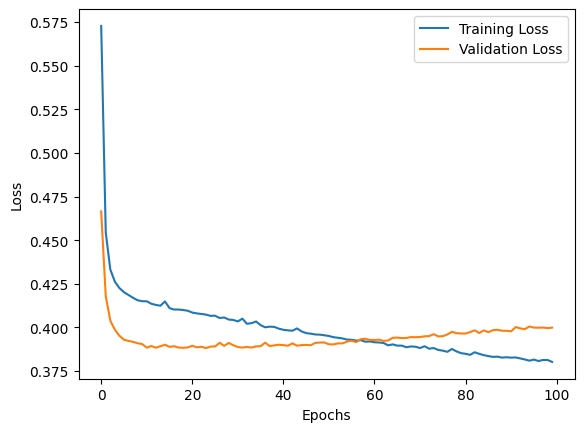

In [74]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observation: The initial model didn't show overfitting. (Appart from last few epochs)

Model with more layers with validation loss

In [75]:
model3_v = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),  # Added another layer
    layers.Dense(1, activation='sigmoid')
])
model3_v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model3_v.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7256 - loss: 0.5434 - val_accuracy: 0.7970 - val_loss: 0.4294
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7788 - loss: 0.4524 - val_accuracy: 0.8183 - val_loss: 0.4016
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7993 - loss: 0.4177 - val_accuracy: 0.8142 - val_loss: 0.3947
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7995 - loss: 0.4310 - val_accuracy: 0.8122 - val_loss: 0.3935
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8094 - loss: 0.4061 - val_accuracy: 0.8122 - val_loss: 0.3916
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8206 - loss: 0.3932 - val_accuracy: 0.8081 - val_loss: 0.3924
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8063 - loss: 0.4148 - val_accuracy: 0.8102 - val_loss: 0.3946
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8048 - loss: 0.4155 - val_accu

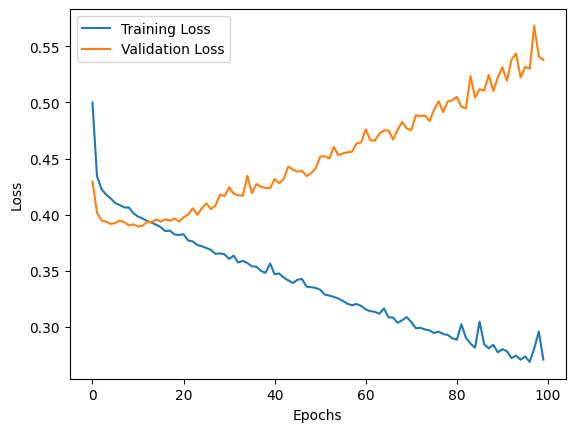

In [76]:
# Plot training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observation: Deeper Models are showing overfitting after initial epochs as training loss is decreasing but validation loss is increasing

Model after dropout layer and batch normalization

In [77]:
model5_v = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32),
    layers.BatchNormalization(),  # Batch normalization layer
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(16),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(8),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='sigmoid')
])

model5_v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model5_v.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6897 - loss: 0.6004 - val_accuracy: 0.8041 - val_loss: 0.4887
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7780 - loss: 0.4895 - val_accuracy: 0.8051 - val_loss: 0.4387
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7655 - loss: 0.4760 - val_accuracy: 0.8112 - val_loss: 0.4212
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7860 - loss: 0.4543 - val_accuracy: 0.8142 - val_loss: 0.4122
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7749 - loss: 0.4596 - val_accuracy: 0.8173 - val_loss: 0.4058
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7889 - loss: 0.4442 - val_accuracy: 0.8183 - val_loss: 0.4019
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7844 - loss: 0.4401 - val_accuracy: 0.8183 - val_loss: 0.4038
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7737 - loss: 0.4548 - val_accu

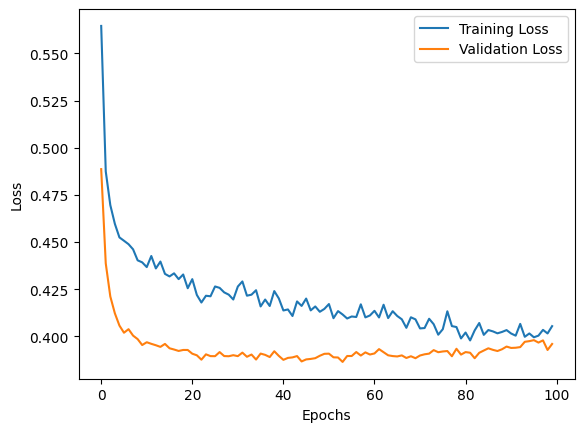

In [78]:
# Plot training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observation: We can see that no overfitting was observed after adding dropout and batch normalization.Lets buid on this further to increase accuracy

Incresing Layers with dropouts and batch normalization

In [79]:
model6_v = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64),  # Increased units
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(16),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='sigmoid')
])

model6_v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model6_v.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5469 - loss: 0.7323 - val_accuracy: 0.7919 - val_loss: 0.5007
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7671 - loss: 0.4940 - val_accuracy: 0.7980 - val_loss: 0.4426
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7724 - loss: 0.4844 - val_accuracy: 0.8041 - val_loss: 0.4188
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7744 - loss: 0.4667 - val_accuracy: 0.8010 - val_loss: 0.4112
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7661 - loss: 0.4571 - val_accuracy: 0.8041 - val_loss: 0.4070
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7918 - loss: 0.4511 - val_accuracy: 0.8071 - val_loss: 0.4033
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7807 - loss: 0.4473 - val_accuracy: 0.8081 - val_loss: 0.3993
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8091 - loss: 0.4181 - val_accu

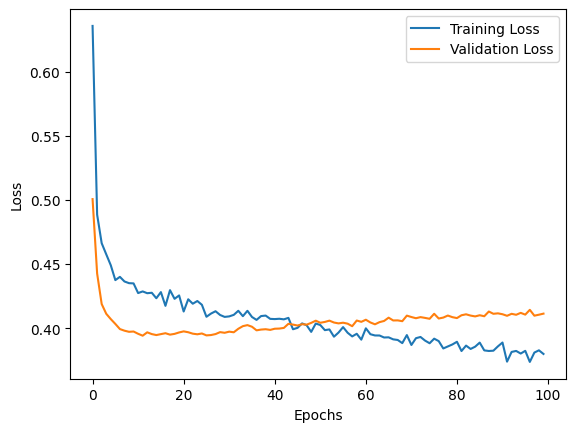

In [80]:
# Plot training and validation loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
# Evaluate the model
y_pred6 = (model6_v.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred6))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1549
           1       0.58      0.57      0.57       561

    accuracy                           0.77      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.77      0.77      2110



Observation: Overfitting is observed in second half of the training epochs. Lets use early stopping to correct this.

Using Early stopping and optimized learning rate

In [82]:
model7_v = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64),  # Increased units
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(16),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



model7_v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history5 = model7_v.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5089 - loss: 0.8173 - val_accuracy: 0.7868 - val_loss: 0.5201 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5218 - val_accuracy: 0.8020 - val_loss: 0.4456 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7926 - loss: 0.4561 - val_accuracy: 0.8051 - val_loss: 0.4146 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7877 - loss: 0.4579 - val_accuracy: 0.8051 - val_loss: 0.4032 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7885 - loss: 0.4349 - val_accuracy: 0.8051 - val_loss: 0.3965 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7957 - loss: 0.4234 - val_accuracy: 0.8102 - val_loss: 0.3953 - learning_rate: 0.0010
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8048 - loss: 0.

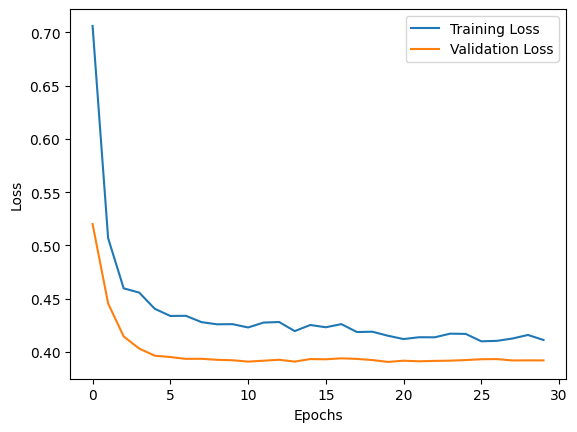

In [83]:
# Plot training and validation loss
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
# Evaluate the model
y_pred7 = (model7_v.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred7))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.63      0.55      0.59       561

    accuracy                           0.79      2110
   macro avg       0.74      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110



Observation: Using Early stopping on deeper models has rectified overfitting and the best result for FNN is observed. Lets experiment with activation function and regularization to see if it further increse the accuracy.

Using Leaky ReLU activation function

In [88]:
from tensorflow.keras.layers import LeakyReLU

model8_v = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.Dropout(0.3),

    layers.Dense(32),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),
    layers.Dropout(0.3),

    layers.Dense(16),
    layers.BatchNormalization(),
    LeakyReLU(alpha=0.1),

    layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



model8_v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history6 = model8_v.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7022 - loss: 0.5689 - val_accuracy: 0.7970 - val_loss: 0.4660 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7764 - loss: 0.4638 - val_accuracy: 0.8071 - val_loss: 0.4202 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7888 - loss: 0.4505 - val_accuracy: 0.8112 - val_loss: 0.4009 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.4419 - val_accuracy: 0.8091 - val_loss: 0.3996 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.4314 - val_accuracy: 0.8152 - val_loss: 0.3961 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7860 - loss: 0.4419 - val_accuracy: 0.8193 - val_loss: 0.3964 - learning_rate: 0.0010
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7842 - loss: 0.

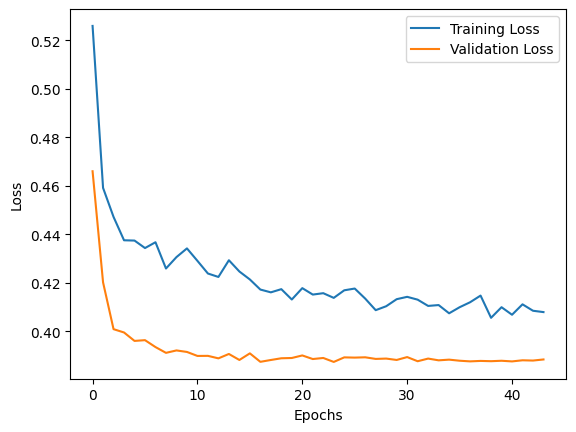

In [89]:
# Plot training and validation loss
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
# Evaluate the model
y_pred8 = (model8_v.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred8))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Observatin: Changing activation function has not affected the accuracy

Using L2 regularization

In [91]:
from tensorflow.keras import regularizers

model9_v = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(32, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



model9_v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history7 = model9_v.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7414 - loss: 0.6427 - val_accuracy: 0.8030 - val_loss: 0.5862 - learning_rate: 0.0010
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7698 - loss: 0.5741 - val_accuracy: 0.8071 - val_loss: 0.5269 - learning_rate: 0.0010
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7723 - loss: 0.5560 - val_accuracy: 0.8000 - val_loss: 0.5054 - learning_rate: 0.0010
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7714 - loss: 0.5455 - val_accuracy: 0.7970 - val_loss: 0.4914 - learning_rate: 0.0010
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7870 - loss: 0.5258 - val_accuracy: 0.8061 - val_loss: 0.4826 - learning_rate: 0.0010
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7871 - loss: 0.5198 - val_accuracy: 0.8051 - val_loss: 0.4764 - learning_rate: 0.0010
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7812 - loss: 0.

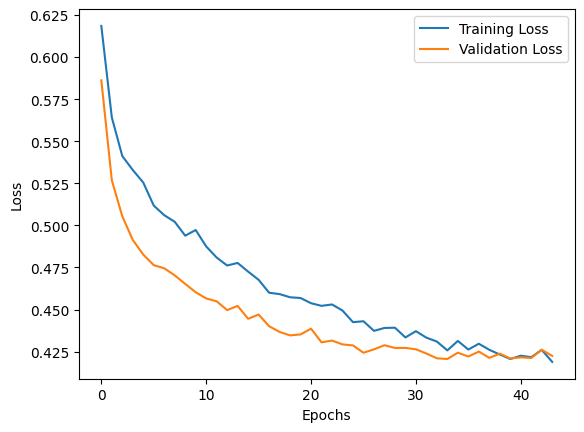

In [92]:
# Plot training and validation loss
plt.plot(history7.history['loss'], label='Training Loss')
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [93]:
# Evaluate the model
y_pred9 = (model9_v.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred9))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.61      0.55      0.58       561

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



Observation: L2 regularization also has not improved the accuracy further.

Using Best FNN model on balanced data from SMOTE.

In [103]:
model10_v = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64),  # Increased units
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(16),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


model10_v.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history8 = model10_v.fit(X_train_balanced, y_train_balanced, epochs=100, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6343 - loss: 0.6288 - val_accuracy: 0.7434 - val_loss: 0.5863 - learning_rate: 0.0010
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7487 - loss: 0.5072 - val_accuracy: 0.7718 - val_loss: 0.5440 - learning_rate: 0.0010
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7707 - loss: 0.4815 - val_accuracy: 0.7635 - val_loss: 0.5412 - learning_rate: 0.0010
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7725 - loss: 0.4675 - val_accuracy: 0.7524 - val_loss: 0.5545 - learning_rate: 0.0010
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7755 - loss: 0.4759 - val_accuracy: 0.7531 - val_loss: 0.5571 - learning_rate: 0.0010
Epoch 6/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7635 - loss: 0.4782 - val_accuracy: 0.7593 - val_loss: 0.5409 - learning_rate: 0.0010
Epoch 7/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7706 - loss: 0.

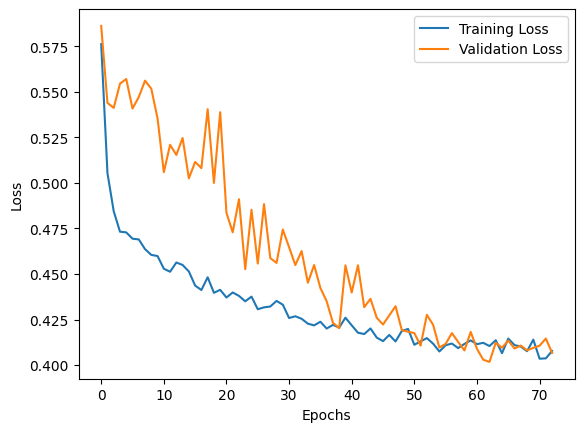

In [104]:
# Plot training and validation loss
plt.plot(history8.history['loss'], label='Training Loss')
plt.plot(history8.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [105]:
# Evaluate the model
y_pred10 = (model10_v.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred10))

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1549
           1       0.57      0.66      0.61       561

    accuracy                           0.77      2110
   macro avg       0.72      0.74      0.72      2110
weighted avg       0.79      0.77      0.78      2110



Observation: Using Balanced data has not increased the overall accuracy further.

# Final Observation:

1.All the 3 ML models(Logitic regression, Random Forest and XGboost), Ensembling of the 3 ML model and  Deep Learning model -FNN has given good overall accuracy after proper tunning and optimization.

2.Stacking the tunned logistic, Random forest and XGboost models have give the best overall acuuracy(0.80).

3.For churn case prediction(class=1), Ensembling(Soft voting) on balanced data and Xgboost on balanced data has given best results having same f1 score(0.62) with former having better precision(0.55) and later having better recall(0.74).